In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Charger le jeu de données
data = pd.read_csv(r'C:\M2DS\S3\Data_Viz\365\project-files-music-genre-classification-with-pca\music_dataset_mod.csv')  

# Faire une copie pour l'analyse
music_data = data.copy()


In [3]:
# Afficher les premières lignes du jeu de données
music_data.head()


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [4]:
# Afficher les informations sur le jeu de données
music_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
# Vérifier les valeurs nulles ou manquantes
music_data.isnull().sum()


Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [6]:
# Calculer le pourcentage des valeurs manquantes dans la colonne 'Genre'
missing_percentage = music_data['Genre'].isnull().mean() * 100
print(f"Pourcentage des valeurs manquantes dans 'Genre' : {missing_percentage:.2f}%")


Pourcentage des valeurs manquantes dans 'Genre' : 11.00%


In [7]:
# Trouver les genres uniques et leur nombre
unique_genres = music_data['Genre'].unique()
print(f"Genres Uniques : {unique_genres}")
print(f"Nombre de Genres Uniques : {len(unique_genres)}")


Genres Uniques : ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']
Nombre de Genres Uniques : 6


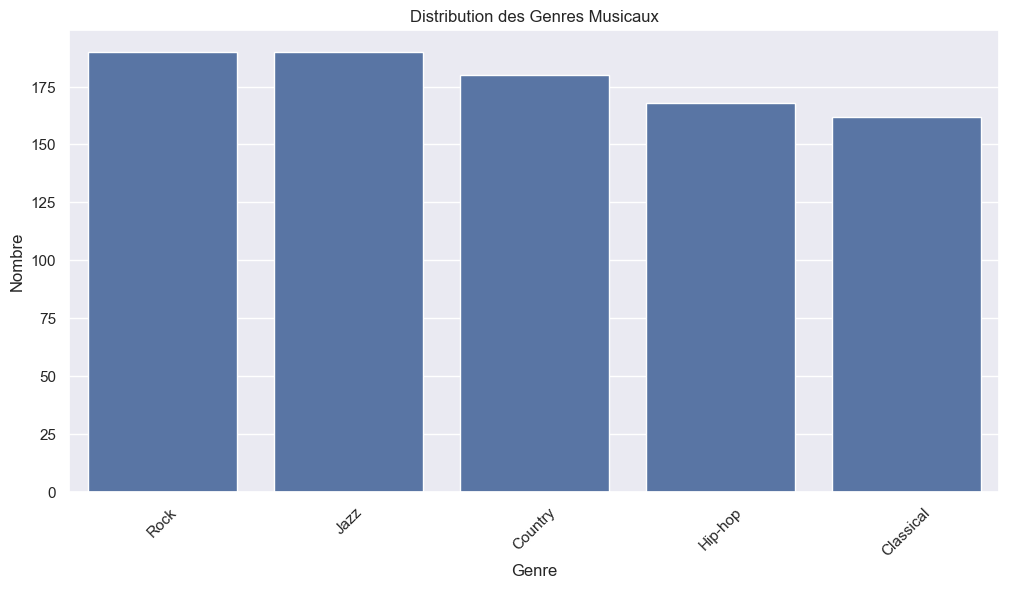

In [8]:
# Visualiser la distribution des genres
plt.figure(figsize=(12, 6))
sns.countplot(data=music_data, x='Genre', order=music_data['Genre'].value_counts().index)
plt.title("Distribution des Genres Musicaux")
plt.xlabel("Genre")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Afficher les comptes des genres
genre_counts = music_data['Genre'].value_counts()
genre_counts


Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

In [10]:
# Vérifier si le jeu de données est équilibré
max_genre = genre_counts.max()
min_genre = genre_counts.min()
print(f"Nombre de l genre le plus commun : {max_genre}")
print(f"Nombre du genre le moins commun : {min_genre}")


Nombre de l genre le plus commun : 190
Nombre du genre le moins commun : 162


## Aperçu des Données

### Vue d'ensemble du Jeu de Données
- Le jeu de données contient 13 colonnes et 1000 entrées.
- La colonne `Genre` comporte 110 valeurs manquantes.
- Toutes les autres caractéristiques sont complètes (non-nulles).

### Genres Uniques
- Il y a 6 genres uniques : 'Country', 'Classical', 'Rock', 'Hip-hop', 'Jazz', et `NaN` (manquants).
- Ces genres indiquent un problème de classification multi-classes.

### Distribution des Genres
- Le nombre d'occurrences pour chaque genre est le suivant :
  - Rock : 190
  - Jazz : 190
  - Country : 180
  - Hip-hop : 168
  - Classical : 162
- Le genre le plus courant (Rock et Jazz) possède 190 morceaux, et le genre le moins courant (Classical) en possède 162.

### Évaluation de l'Équilibre
- Les comptes des genres sont relativement proches, ce qui indique que le jeu de données est modérément équilibré.
- Il n'y a pas de grande disparité, ce qui est avantageux pour l'entraînement d'un modèle de classification car cela réduit le risque de biais.


In [11]:
# Supprimer les lignes avec des labels de genre manquants
music_data_nonull = music_data.dropna()
music_data_nonull


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [12]:
# Séparer les données en caractéristiques (features) et cible (target)
X = music_data_nonull.drop(columns=['Genre'])
y = music_data_nonull['Genre']


In [13]:
# Encoder la colonne 'Genre' en valeurs numériques
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [14]:
# Créer une copie du dataset avec le genre encodé
df_with_encoded_genre = music_data_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded
df_with_encoded_genre


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


In [15]:
# Afficher la correspondance entre les genres originaux et les valeurs encodées
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(genre_mapping)


{'Classical': np.int64(0), 'Country': np.int64(1), 'Hip-hop': np.int64(2), 'Jazz': np.int64(3), 'Rock': np.int64(4)}


In [16]:
# Calculer la matrice de corrélation pour le dataframe avec les valeurs numériques du Genre
correlation_matrix = df_with_encoded_genre.corr()


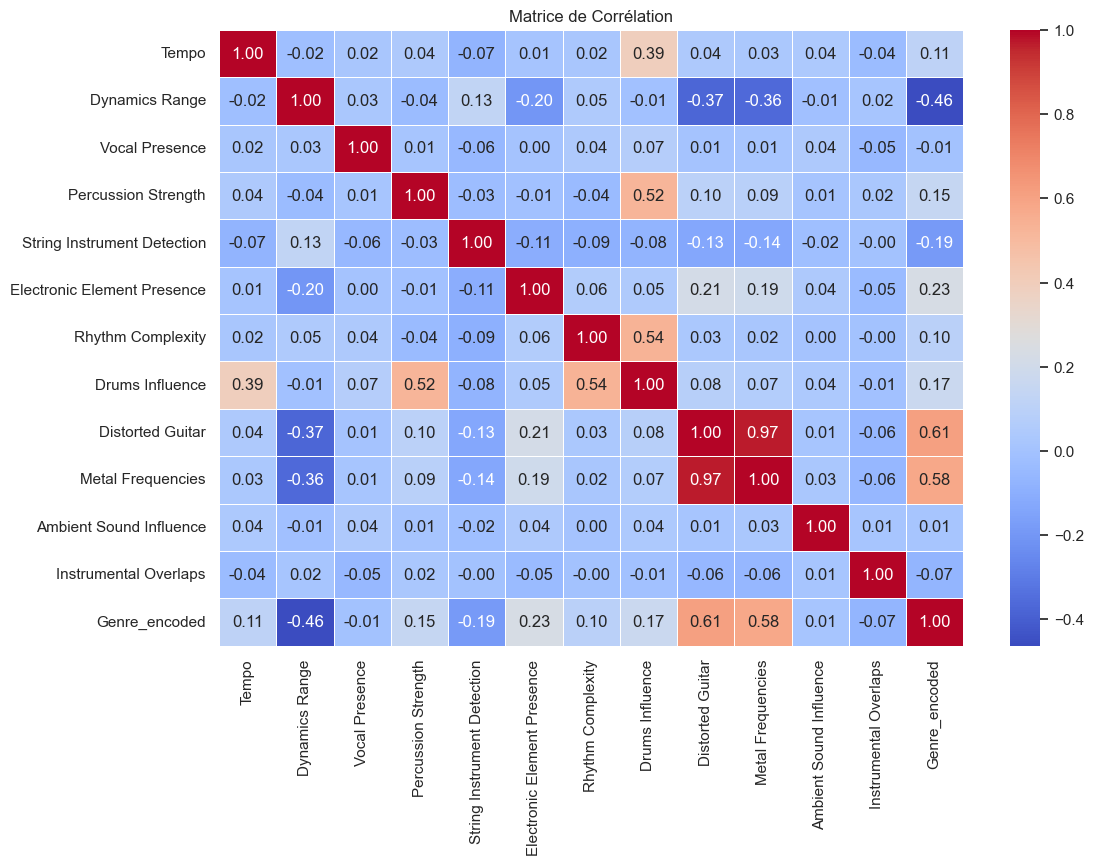

In [17]:
# Visualiser la matrice de corrélation sous forme de carte thermique
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


## Aperçus de la Matrice de Corrélation

Voici un résumé des principales observations et insights dérivés de la matrice de corrélation :

### Corrélations Positives Fortes avec le Genre :
- **Guitare Distordue** : 0.607  
- **Fréquences Métalliques** : 0.582  
- **Présence d'Élément Électronique** : 0.233  
  Ces caractéristiques sont probablement des indicateurs clés de certains genres (par exemple, Rock ou Metal).

### Corrélations Négatives avec le Genre :
- **Plage Dynamique** : -0.463  
- **Détection d'Instrument à Cordes** : -0.185  
  Ces caractéristiques pourraient être inversement associées avec les genres qui reposent sur des éléments électroniques ou distordus.

### Corrélations Élevées entre les Caractéristiques :
- **Guitare Distordue** et **Fréquences Métalliques** : 0.966  
- **Influence des Percussions** et **Complexité du Rythme** : 0.537  
- **Influence des Percussions** et **Force de Percussion** : 0.525  
  De telles corrélations élevées pourraient indiquer une redondance des caractéristiques, nécessitant éventuellement une réduction de la dimensionnalité ou une sélection des caractéristiques.

### Corrélations Faibles avec le Genre :
- **Influence du Son Ambiant** : 0.015  
- **Présence Vocale** : -0.006  
  Ces caractéristiques peuvent ne pas contribuer de manière significative à la prédiction du `Genre` et pourraient être reléguées au second plan lors de la modélisation.


In [18]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# Appliquer la réduction de dimensionnalité avec PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [20]:
# Calculer la variance expliquée par chaque composant principal
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composant :")
print(explained_variance)


Variance expliquée par chaque composant :
[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


In [21]:
# Déterminer le nombre de composants pour 80% de variance
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Nombre de composants nécessaires pour 80% de variance : {num_components}")


Nombre de composants nécessaires pour 80% de variance : 8


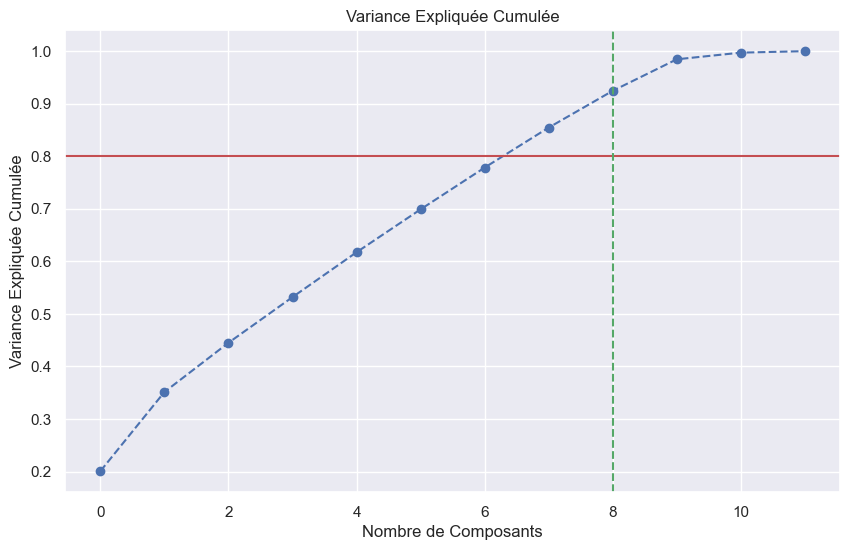

In [25]:
# Tracer la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=num_components, color='g', linestyle='--')
plt.title("Variance Expliquée Cumulée")
plt.xlabel("Nombre de Composants")
plt.ylabel("Variance Expliquée Cumulée")
plt.grid(True)
plt.show()


## PCA pour la Réduction de Dimensionnalité

### Résultats :
- **Nombre de composants nécessaires pour 80% de variance** : 8  
  Cela indique qu'en utilisant 8 composants principaux, on conserve 80% de la variabilité du jeu de données, réduisant ainsi significativement la dimensionnalité de 12 à 8 caractéristiques.

- **Ratio de Variance Expliquée** :
  - PC1 : 20.12%
  - PC2 : 15.04%
  - PC3 : 9.27%
  - PC4 : 8.68%
  - PC5 : 8.52%
  - PC6 : 8.18%
  - PC7 : 7.90%
  - PC8 : 7.74%
  - Les composants restants expliquent collectivement moins de 20% de la variance.

### Aperçus :
- Les deux premiers composants (PC1 et PC2) expliquent ensemble **35.16%** de la variance.
- Chaque composant supplémentaire apporte des rendements décroissants dans la variance expliquée.
- En sélectionnant 8 composants, la dimensionnalité du jeu de données est réduite d'un tiers tout en conservant la majeure partie de l'information (80% de la variance).

### Visualisation :
- Le graphique de la variance expliquée cumulée met en évidence le "point du coude", qui se situe au 8e composant, correspondant au seuil de 80%.


In [26]:
# Utiliser les huit premiers composants principaux en fonction des résultats du PCA
pca = PCA(n_components=8) 
X_pca = pca.fit_transform(X_scaled)


In [27]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)


In [28]:
# Entraîner un classificateur avec régression logistique

classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [29]:
# Prédire et évaluer le modèle

y_pred = classifier.predict(X_test)
print("Accuracy avec PCA :", accuracy_score(y_test, y_pred))
print("\nRapport de Classification :\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy avec PCA : 0.5355805243445693

Rapport de Classification :
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [30]:
# Diviser les données originales (non-PCA) en ensembles d'entraînement et de test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)


In [31]:
# Entraîner un modèle de régression logistique avec les caractéristiques originales
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)


LogisticRegression(max_iter=10000)

In [32]:
# Prédire et évaluer le modèle avec les caractéristiques originales

y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy avec les caractéristiques originales :", accuracy_score(y_test_orig, y_pred_orig))
print("\nRapport de Classification avec les caractéristiques originales :\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))


Accuracy avec les caractéristiques originales : 0.5318352059925093

Rapport de Classification avec les caractéristiques originales :
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



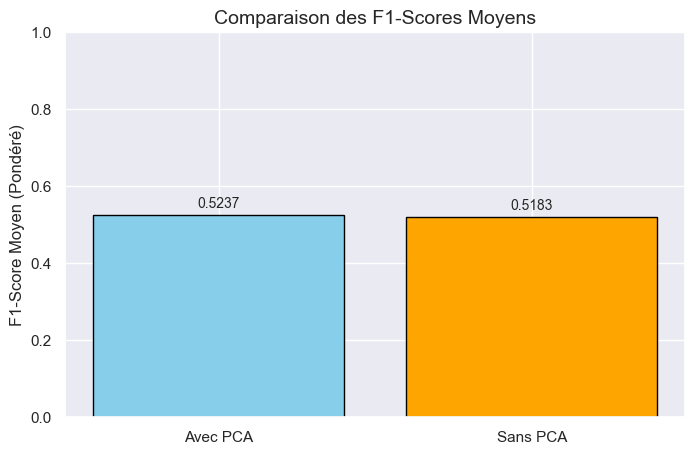

In [35]:
from sklearn.metrics import f1_score

# Calculer les f1-scores moyens pondérés pour les deux modèles
f1_pca = f1_score(y_test, y_pred, average='weighted')
f1_orig = f1_score(y_test_orig, y_pred_orig, average='weighted')

# Données des f1-scores moyens
scores = [f1_pca, f1_orig]
labels = ['Avec PCA', 'Sans PCA']

# Création du graphique en barres
plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['skyblue', 'orange'], edgecolor='black')
plt.title("Comparaison des F1-Scores Moyens", fontsize=14)
plt.ylabel("F1-Score Moyen (Pondéré)", fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10)

plt.show()

In [36]:
# Calculer les f1-scores pour chaque genre avant et après PCA
f1_per_class_pca = f1_score(y_test, y_pred, average=None)
f1_per_class_orig = f1_score(y_test_orig, y_pred_orig, average=None)

# Création des étiquettes des genres
genres = le.classes_

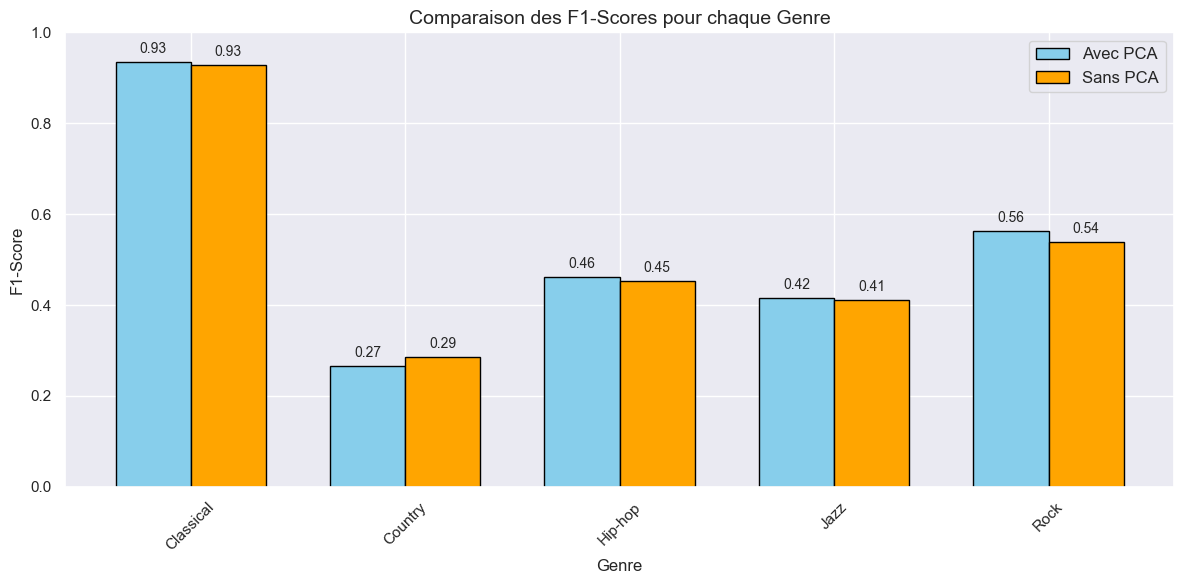

In [37]:
# Position des barres
x = np.arange(len(genres))

# Largeur des barres
bar_width = 0.35

# Création du graphique en barres groupées
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, f1_per_class_pca, width=bar_width, color='skyblue', label='Avec PCA', edgecolor='black')
plt.bar(x + bar_width/2, f1_per_class_orig, width=bar_width, color='orange', label='Sans PCA', edgecolor='black')

# Ajouter des étiquettes et un titre
plt.title("Comparaison des F1-Scores pour chaque Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(x, genres, rotation=45)
plt.ylim(0, 1)
plt.legend(fontsize=12)

# Ajouter les valeurs sur les barres
for i in range(len(genres)):
    plt.text(x[i] - bar_width/2, f1_per_class_pca[i] + 0.02, f"{f1_per_class_pca[i]:.2f}", ha='center', fontsize=10)
    plt.text(x[i] + bar_width/2, f1_per_class_orig[i] + 0.02, f"{f1_per_class_orig[i]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Observations des Résultats de la Régression Logistique

### Régression Logistique sur les Données Originales
**Précision (Accuracy)** : 53%  
**Observations** :  
- Une précision et un rappel élevés pour la Classe 0 (probablement une classe surreprésentée ou distincte).  
- Une précision et un rappel plus faibles pour d'autres classes, notamment la Classe 1.  
- Le f1-score pondéré reflète une performance déséquilibrée entre les classes.  

### Régression Logistique sur les Données Transformées par PCA
**Précision (Accuracy)** : 54%  
**Observations** :  
- Une légère amélioration de la précision par rapport aux données originales.  
- Les métriques de précision et de rappel restent biaisées en faveur de la Classe 0.  
- Une amélioration modérée du f1-score pour les Classes 2, 3 et 4.  

### Points Clés
**Impact de la PCA** :  
- Les caractéristiques transformées par PCA ont permis une légère amélioration de la précision, suggérant que la réduction de la dimensionnalité a conservé des informations pertinentes tout en éliminant le bruit ou les redondances.  
- Toutefois, le déséquilibre des performances entre les classes persiste.  

**Performance entre les Classes** :  
- Les deux modèles ont eu des difficultés avec les Classes 1 et 3, indiquant que ces genres peuvent se chevaucher significativement dans l'espace des caractéristiques ou manquer de modèles distinctifs.  
- La précision et le rappel pour la Classe 0 (probablement un genre bien défini) sont restés constamment élevés.  


In [40]:
# Créer un nouveau DataFrame contenant uniquement les lignes avec un genre inconnu (valeurs manquantes dans la colonne 'Genre')
data_unknown_genre = music_data[music_data['Genre'].isnull()].copy()

# Afficher le DataFrame contenant les genres manquants
data_unknown_genre


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [41]:
# Préparer les données pour la prédiction
X_unknown = data_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

# Prédire les genres en utilisant le modèle de classification
y_unknown_pred = classifier.predict(X_unknown_pca)


In [42]:
# Assigner les genres prédits au DataFrame contenant les genres inconnus
data_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)


In [43]:
# Afficher le DataFrame avec les genres prédits
data_unknown_genre[['Predicted_Genre']]


,Predicted_Genre
13,Classical
18,Country
22,Country
31,Rock
42,Rock
...,...
991,Hip-hop
992,Rock
993,Hip-hop
994,Hip-hop
